In [145]:
import pandas as pd

data1 = pd.read_csv('../../raw/통합 테이블(공원)_2019.csv')
data2 = pd.read_csv('../../raw/지역사회건강조사 (전처리된 데이터)_2019/통합 테이블(건강)_2019.csv')
data2.rename(columns={'지역':'자치구'},inplace = True)
df2 = data2[data2['연령별'] == '계']
df2 = df2[df2['성별'] == '계']
df2.set_index('자치구',inplace = True)
data1.set_index('자치구',inplace = True)
df = pd.concat([df2,data1],axis=1)
df = df.drop(df.index[0])
df = df.drop(['연령별','성별'],axis=1)

In [146]:
df = df[['주관적 건강수준','행복감 지수','긍정적 태도율(자연환경)','1인당 공원 면적','1인당 총 도시림 면적','1인당 생활권 도시림 면적']]

<AxesSubplot:xlabel='자치구'>

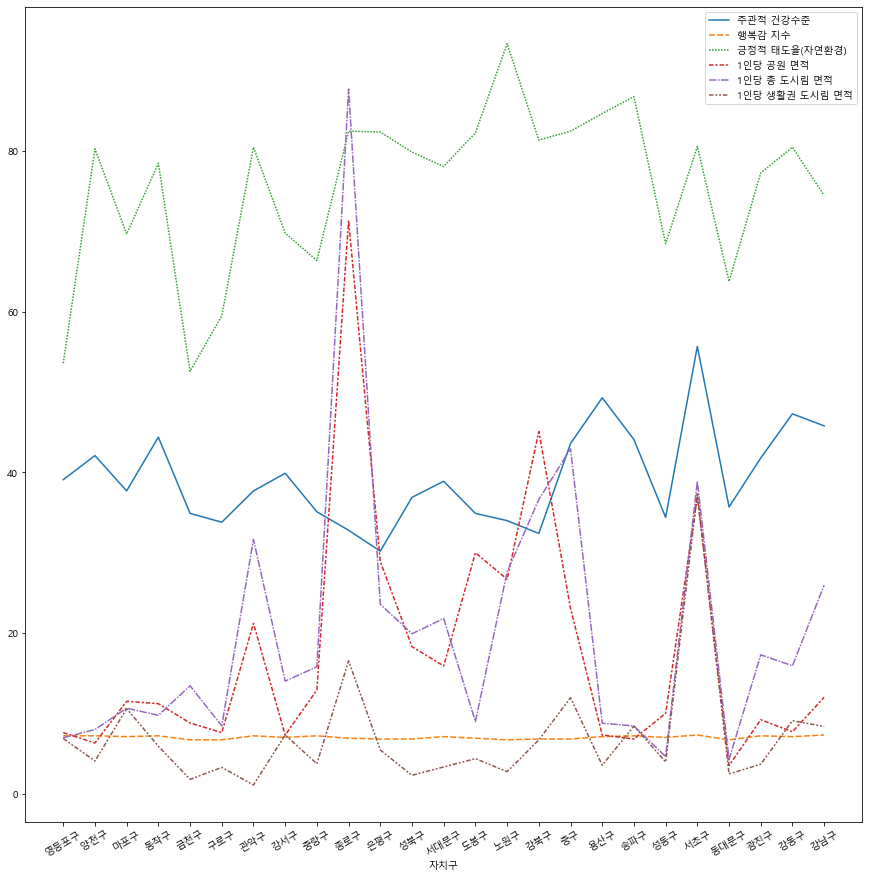

In [147]:
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
fm = mp.font_manager.FontManager()

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15,15))
plt.xticks(rotation=30)
sns.lineplot(data=df)

In [148]:
corr = df.corr()
corr

,주관적 건강수준,행복감 지수,긍정적 태도율(자연환경),1인당 공원 면적,1인당 총 도시림 면적,1인당 생활권 도시림 면적
주관적 건강수준,1.000000,0.652324,0.232622,-0.247116,-0.072326,0.552591
행복감 지수,0.652324,1.000000,0.095909,-0.217842,-0.109691,0.310708
긍정적 태도율(자연환경),0.232622,0.095909,1.000000,0.424483,0.381530,0.181672
1인당 공원 면적,-0.247116,-0.217842,0.424483,1.000000,0.886708,0.458081
1인당 총 도시림 면적,-0.072326,-0.109691,0.381530,0.886708,1.000000,0.481289
1인당 생활권 도시림 면적,0.552591,0.310708,0.181672,0.458081,0.481289,1.000000


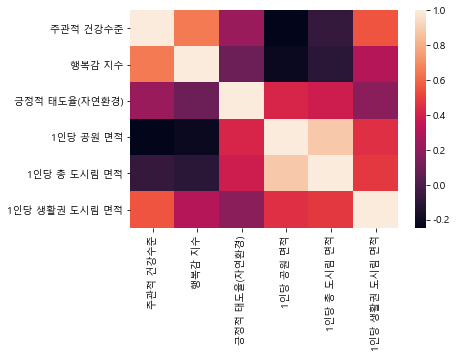

In [112]:
sns.heatmap(corr)
plt.rc('axes', unicode_minus=False)
plt.show()

In [113]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
df1 = df[['주관적 건강수준','1인당 생활권 도시림 면적']]
df1.rename(columns={'주관적 건강수준':'주관적건강수준','1인당 생활권 도시림 면적':'_1인당생활권도시림면적'},inplace = True)

C:\Users\gimhu\anaconda3\lib\site-packages\pandas\core\frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [139]:
import numpy as np

np.cov(df1['주관적건강수준'],df1['_1인당생활권도시림면적']) # 공분산 [0[1]

array([[37.1925    , 24.52300657],
       [24.52300657, 52.95222843]])

In [140]:
np.corrcoef(df1['주관적건강수준'],df1['_1인당생활권도시림면적']) #피어슨 상관계수

array([[1.        , 0.55259113],
       [0.55259113, 1.        ]])

In [144]:
stats.pearsonr(df1['주관적건강수준'],df1['_1인당생활권도시림면적'])

(0.5525911279571889, 0.004176190084243225)

In [142]:
stats.spearmanr(df1['주관적건강수준'],df1['_1인당생활권도시림면적']).correlation #spearman 상관계수 
#상관분석을 실시함에 있어 서열척도 를 사용한 변수가 포함되어 있거나
#등간/비율척도를 사용한 변수들이라 하더라도, 두 변수 간의 관계가 비선형적 일 때 구하는 상관계수

0.3470565859050917

In [143]:
stats.kendalltau(df1['주관적건강수준'],df1['_1인당생활권도시림면적']).correlation #kendall의 tau
#spearman의 상관계수와 마찬가지로, 비선형적 관게이거나 서열변수일 때 사용
#spearman의 상관계수보다 믿을만 한 것으로 알려짐 (특히 표본이 작을 때)


0.2341150217317279

C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='_1인당생활권도시림면적', ylabel='주관적건강수준'>

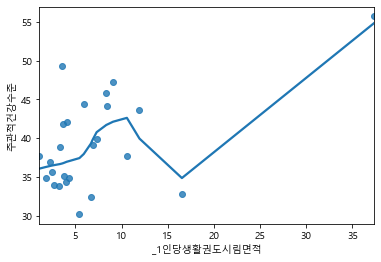

In [117]:
sns.regplot('_1인당생활권도시림면적','주관적건강수준', lowess=True, data = df1)

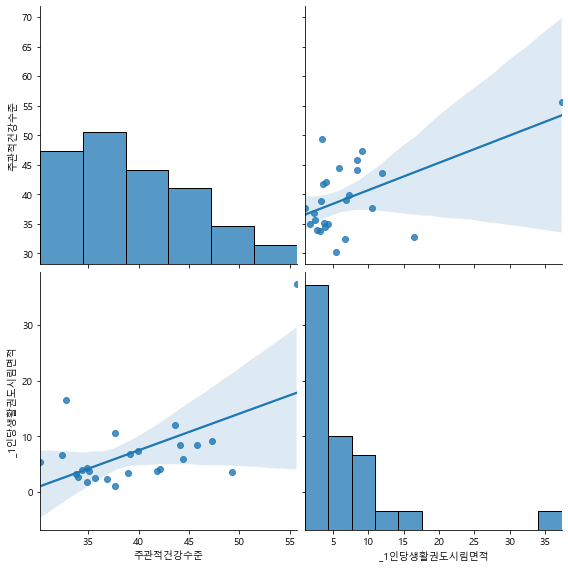

In [121]:
sns.pairplot(df1, kind='reg', height=4)

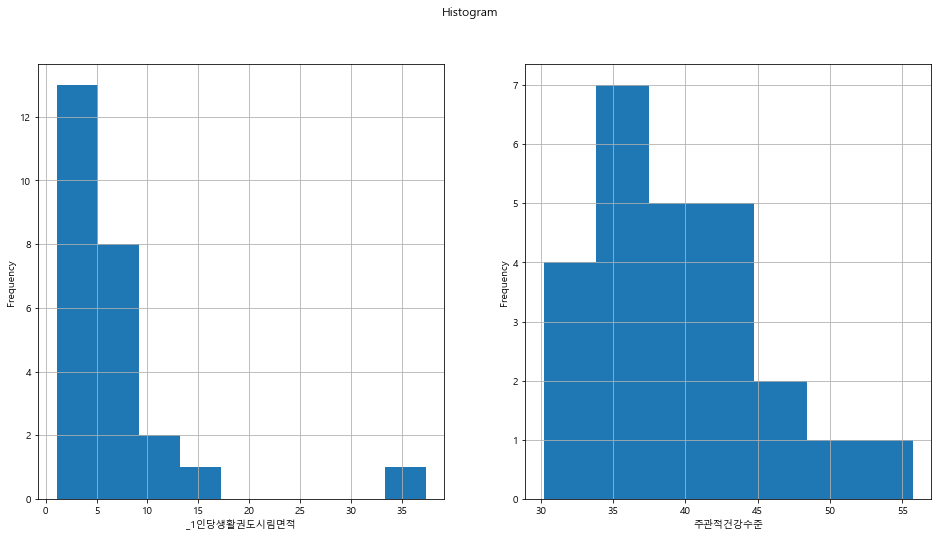

In [122]:
plt.figure(figsize=(16, 8))
plt.suptitle("Histogram")         

plt.subplot(1,2,1)                
plt.hist(df1._1인당생활권도시림면적, bins=9)     
plt.xlabel("_1인당생활권도시림면적")
plt.ylabel("Frequency")
plt.grid()                        # 플롯에 격자 보이기

plt.subplot(1,2,2)                # 2번 플롯
plt.hist(df1.주관적건강수준, bins=7)      # GDP1을 7등분하여 히스토그램 작성
plt.xlabel("주관적건강수준")
plt.ylabel("Frequency")
plt.grid()                        # 플롯에 격자 보이기

plt.show() 

In [123]:
import scipy.stats as stats

corr1 = stats.pearsonr(df1._1인당생활권도시림면적, df1.주관적건강수준)
corr1

(0.5525911279571889, 0.004176190084243225)

C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\gimhu\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_w

Text(0.5, 1.0, '주관적건강수준')

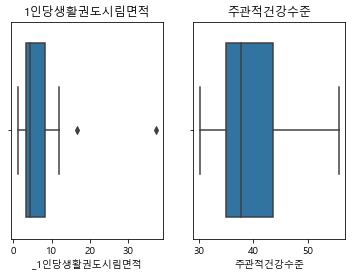

In [127]:
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 상자 그림을 첫번째(ax1)로 그린다. 방향은 수직(orient='v')
sns.boxplot('_1인당생활권도시림면적', data=df1, ax=ax1, orient='v')
ax1.set_title('1인당생활권도시림면적')

# dist의 상자 그림을 두번째(ax2)로 그린다.
sns.boxplot('주관적건강수준', data=df1, ax=ax2, orient='v')
ax2.set_title('주관적건강수준')

Text(0.5, 1.0, '주관적건강수준')

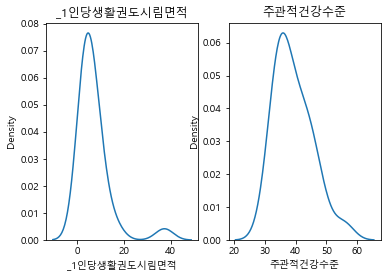

In [129]:
# 1행 2열 형태로 2개의 그래프를 그린다
fig, (ax1, ax2) = plt.subplots(1, 2)  

# speed의 밀도 플롯
sns.kdeplot(df1['_1인당생활권도시림면적'], ax=ax1)
ax1.set_title('_1인당생활권도시림면적')

# dist의 밀도 플롯
sns.kdeplot(df1['주관적건강수준'], ax=ax2)
ax2.set_title('주관적건강수준')

In [137]:
stats.skew(df1['_1인당생활권도시림면적'])

3.103679757212262

In [138]:
stats.skew(df1['주관적건강수준'])

0.8353098870646858

In [115]:
model = smf.ols(formula = '주관적건강수준 ~ _1인당생활권도시림면적', data = df1)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                주관적건강수준   R-squared:                       0.305
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     10.11
Date:                Wed, 14 Jul 2021   Prob (F-statistic):            0.00418
Time:                        15:41:12   Log-Likelihood:                -75.610
No. Observations:                  25   AIC:                             155.2
Df Residuals:                      23   BIC:                             157.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       36.0649      1.454     24.808      0.000      33.058      39.072
_1인당생활권도시림면적     0.4631      0.146      3.180      0.004       0.162       0.764
==============================================================================
Omnibus:                        0.264   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.876   Jarque-Bera (JB):                0.004
Skew:                           0.027   Prob(JB):                        0.998
Kurtosis:                       2.967   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

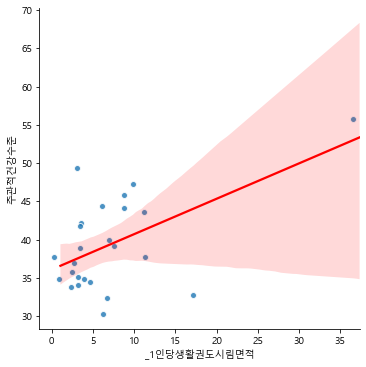

In [116]:
sns.lmplot(x="_1인당생활권도시림면적", y="주관적건강수준", data=df1, line_kws={'color':"red"}, scatter_kws={'edgecolor':"white"}, x_jitter=.9)